## Parte 1 - Instalando todo lo requerido


---




Bienvenidos al primer análisis de datos de la materia. Vamos a introducirnos en lo básico del manejo de datos y análisis exploratorio-descriptivo. Pero primero, instalamos las librerias necesarias de python.

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Una vez instaladas, las importamos. Noten que a partir de ahora van a recibir nombres abreviados, cuando invoquemos a pandas nos referiremos al mismo por ejemplo como pd.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Este punto es crucial, dado que estamos trabajando en drive, tenemos que vincular a este notebook con el mismo. Una vez que ejecutemos el comando nos va a pedir autorización para entrar. Cuando le demos el ok, "drive" aparecerá como una carpeta, arriba a la izquierda.

In [2]:
# En este punto vvin
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En dicha carpeta vamos a poder buscar el archivo que nos interesa, en este caso "entrenamiento_inicial.csv". Si lo dejaron donde yo, van a poder correr el siguiente comando y leerlo sin problema. En caso contrario deben darle boton derecho y copiar la dirección del archivo.

In [5]:
# Cargar los datos del archivo Excel
df = pd.read_csv("/content/drive/MyDrive/IMD/entrenamiento_inicial.csv")

Si fueron bien hasta acá deberían tener el archivo cargado y sin ningún error. Ahora pueden imprimir las primeras lineas para verlo.

## Parte 2 - Mirando los datos
En este punto vamos a solamente mirar los datos, intentar entender como estan organizados, que variables hay en juego, y que tipo de valores corresponde a cada una.

In [6]:
# Mostrar los primeros 5 registros
print(df.head())

   Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
0             1              0       3  masculino    22         1      0   
1             2              1       1   femenino    38         1      0   
2             3              1       3   femenino    26         0      0   
3             4              1       1   femenino    35         1      0   
4             5              0       3  masculino    35         0      0   

  Embarco  
0       S  
1       C  
2       S  
3       S  
4       S  


In [8]:
# verificar los primeros cinco registros del DataFrame
print(df.head())

   Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
0             1              0       3  masculino    22         1      0   
1             2              1       1   femenino    38         1      0   
2             3              1       3   femenino    26         0      0   
3             4              1       1   femenino    35         1      0   
4             5              0       3  masculino    35         0      0   

  Embarco  
0       S  
1       C  
2       S  
3       S  
4       S  


In [9]:
# verificar el número de filas y columnas del DataFrame
print(df.shape)

(689, 8)


In [10]:
# obtener información sobre las columnas del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id Pasajeros   689 non-null    int64 
 1   Supervivencia  689 non-null    int64 
 2   Pclass         689 non-null    int64 
 3   Sexo           689 non-null    object
 4   Edad           689 non-null    int64 
 5   Hermanos       689 non-null    int64 
 6   Hijos          689 non-null    int64 
 7   Embarco        687 non-null    object
dtypes: int64(6), object(2)
memory usage: 43.2+ KB
None


In [11]:
# obtener estadísticas descriptivas para las columnas numéricas
print(df.describe())

       Id Pasajeros  Supervivencia      Pclass        Edad    Hermanos  \
count    689.000000     689.000000  689.000000  689.000000  689.000000   
mean     449.896952       0.409289    2.223512   29.847605    0.518142   
std      257.950356       0.492060    0.841838   14.317669    0.938535   
min        1.000000       0.000000    1.000000    1.000000    0.000000   
25%      227.000000       0.000000    1.000000   21.000000    0.000000   
50%      447.000000       0.000000    2.000000   28.000000    0.000000   
75%      676.000000       1.000000    3.000000   38.000000    1.000000   
max      891.000000       1.000000    3.000000   80.000000    5.000000   

            Hijos  
count  689.000000  
mean     0.428157  
std      0.856485  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      6.000000  


¿Todos los valores tienen sentido? ¿Es lógico hacer un promedio del ID de los pasajeros? ¿Y de la Pclass?

## Parte 3 - Valores nulos
Esta parte es sumamente importante, y si no es bien tratada puede derivar en errores en pasos posteriores. Consiste  en analizar los valroes nulos o faltantes y tomar una decisión en torno a su tratamiento.

In [12]:
# verificar si hay valores nulos o faltantes en el DataFrame
print(df.isnull().sum())

Id Pasajeros     0
Supervivencia    0
Pclass           0
Sexo             0
Edad             0
Hermanos         0
Hijos            0
Embarco          2
dtype: int64


Vemos que "embarco" tiene dos valores nulos. A continuación se describen dos opciones para eliminarlos. 

In [13]:
# eliminar todas las filas que contienen valores nulos (dejamos comentado el código para que no se ejecute)
#df = df.dropna()

# eliminar solo las filas que contienen valores nulos en una columna específica
df = df.dropna(subset=['Embarco'])


Verificamos ahora si se borraron

In [14]:
# verificar si hay valores nulos o faltantes en el DataFrame
print(df.isnull().sum())

Id Pasajeros     0
Supervivencia    0
Pclass           0
Sexo             0
Edad             0
Hermanos         0
Hijos            0
Embarco          0
dtype: int64


Y vemos como afecta a la cantidad de filas

In [15]:
# verificar el número de filas y columnas del DataFrame
print(df.shape)

(687, 8)


Nótese que la decisión de eliminar toda la fila afectará también a las otras variables, que si tenian valores, por lo tanto en este punto debemos re-analizar la base:

In [16]:
# obtener estadísticas descriptivas para las columnas numéricas
print(df.describe())

       Id Pasajeros  Supervivencia      Pclass        Edad    Hermanos  \
count    687.000000     687.000000  687.000000  687.000000  687.000000   
mean     449.908297       0.407569    2.227074   29.788937    0.519651   
std      257.492583       0.491740    0.840464   14.282367    0.939484   
min        1.000000       0.000000    1.000000    1.000000    0.000000   
25%      228.000000       0.000000    1.000000   21.000000    0.000000   
50%      447.000000       0.000000    2.000000   28.000000    0.000000   
75%      675.000000       1.000000    3.000000   38.000000    1.000000   
max      891.000000       1.000000    3.000000   80.000000    5.000000   

            Hijos  
count  687.000000  
mean     0.429403  
std      0.857420  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      6.000000  


¿Algo cambió?

Otra opción sería modificar los valores por otros específicos

In [ ]:
#Dejamos comentado el código para que no se ejecute

# reemplazar los valores nulos con un valor específico
# df = df.fillna(valor_especifico)

# reemplazar los valores nulos con el promedio de una columna específica
# promedio = df['nombre_columna'].mean()
# df = df.fillna(promedio)


## Parte 4 - Análisis descriptivo univariado

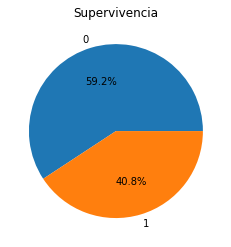

In [17]:
# contar el número de casos en cada valor único de la columna "Supervivencia"
count = df['Supervivencia'].value_counts()

# crear un gráfico de torta con el número de casos en cada valor único de la columna "Supervivencia"
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Supervivencia')
plt.show()

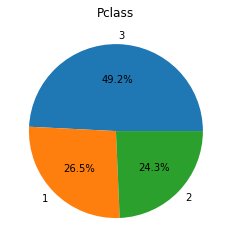

In [18]:
# contar el número de casos en cada valor único de la columna "Supervivencia"
count = df['Pclass'].value_counts()

# crear un gráfico de torta con el número de casos en cada valor único de la columna "Supervivencia"
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Pclass')
plt.show()

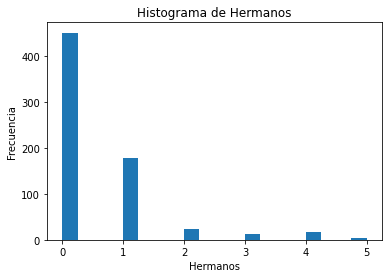

In [24]:
# crear un histograma de la columna "Hermanos"
plt.hist(df['Hermanos'], bins=20)
plt.xlabel('Hermanos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Hermanos')
plt.show()

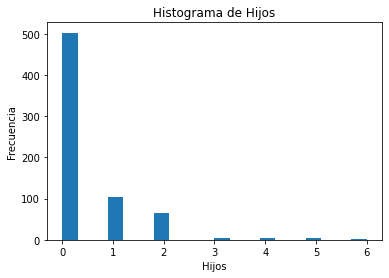

In [25]:
# crear un histograma de la columna "Hijos"
plt.hist(df['Hijos'], bins=20)
plt.xlabel('Hijos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Hijos')
plt.show()

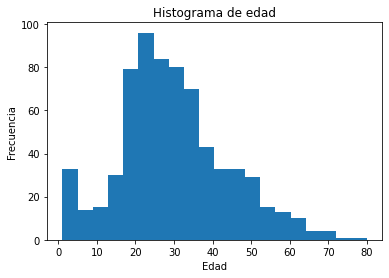

In [21]:
# crear un histograma de la columna "edad"
plt.hist(df['Edad'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad')
plt.show()


Todo parecería ir bien ... Veamos que pasa con la variable edad con mayor detalle




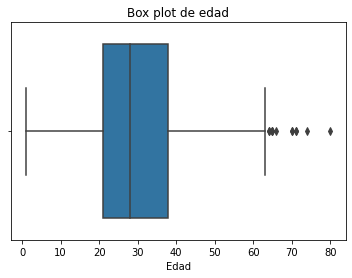

In [28]:
import seaborn as sns

# crear el box plot de la columna "edad" con marcadores de outliers
sns.boxplot(x=df['Edad'], showfliers=True)
plt.title('Box plot de edad')
plt.show()

Ahora si vemos algo un poco raro, hay valores que quedan por fuera del boxplot. Recuerdése el criterio para generarlo de las clases de estadística.

In [29]:
# calcular los cuartiles y el rango intercuartil de la columna "edad"
edad_q1 = df['Edad'].quantile(0.25)
edad_q3 = df['Edad'].quantile(0.75)
edad_iqr = edad_q3 - edad_q1

# filtrar los valores que se encuentran más allá del rango intercuartil
outliers = df[(df['Edad'] < edad_q1 - 1.5 * edad_iqr) | (df['Edad'] > edad_q3 + 1.5 * edad_iqr)]
print(outliers)


     Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
25             34              0       2  masculino    66         0      0   
40             55              0       1  masculino    65         0      1   
72             97              0       1  masculino    71         0      0   
214           281              0       3  masculino    65         0      0   
337           439              0       1  masculino    64         1      4   
352           457              0       1  masculino    65         0      0   
378           494              0       1  masculino    71         0      0   
417           546              0       1  masculino    64         0      0   
482           631              1       1  masculino    80         0      0   
514           673              0       2  masculino    70         0      0   
573           746              0       1  masculino    70         1      1   
654           852              0       3  masculino    74       

Bueno, no hay muchos en el barco, porque no se incorporaba gente mayor a 60 años.

In [30]:
# seleccionar todas las filas que tienen un valor mayor a 60 en la columna "edad"
mayores_de_60 = df.loc[df['Edad'] > 60]

# imprimir el resultado
print(mayores_de_60)

     Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
25             34              0       2  masculino    66         0      0   
40             55              0       1  masculino    65         0      1   
72             97              0       1  masculino    71         0      0   
127           171              0       1  masculino    61         0      0   
192           253              0       1  masculino    62         0      0   
210           276              1       1   femenino    63         1      0   
214           281              0       3  masculino    65         0      0   
249           327              0       3  masculino    61         0      0   
337           439              0       1  masculino    64         1      4   
352           457              0       1  masculino    65         0      0   
370           484              1       3   femenino    63         0      0   
378           494              0       1  masculino    71       

Bien, bueno, entendemos que corresponde a un error posiblemente. Como no estamos seguros, decidimos sacarlos del análisis. Pero como siempre hacemos cuando modificamos una base, nos quedamos con la versión anterior:

In [32]:
# eliminar todas las filas que tienen un valor mayor a 60 en la columna "edad"
df_filtrado = df.drop(df[df['Edad'] > 60].index)

# imprimir el DataFrame resultante
print(df_filtrado)


     Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
0               1              0       3  masculino    22         1      0   
1               2              1       1   femenino    38         1      0   
2               3              1       3   femenino    26         0      0   
3               4              1       1   femenino    35         1      0   
4               5              0       3  masculino    35         0      0   
..            ...            ...     ...        ...   ...       ...    ...   
684           886              0       3   femenino    39         0      5   
685           887              0       2  masculino    27         0      0   
686           888              1       1   femenino    19         0      0   
687           890              1       1  masculino    26         0      0   
688           891              0       3  masculino    32         0      0   

    Embarco  
0         S  
1         C  
2         S  
3      

## Parte 5: Análisis descriptivo bivariado

Podemos ver primero la cantidad de hermanos en promedio en función de la edad. Vemos que a menor edad más hermanos, posiblemente porque viajen en familia. Se muestra el error estándar.


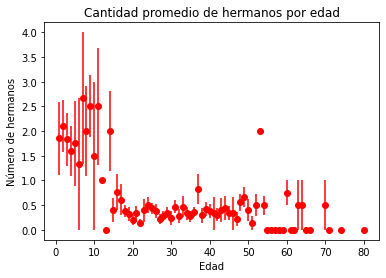

In [39]:
# agrupar los datos por edad y calcular la media y el error estándar de "hermanos" para cada grupo
df_grouped = df.groupby('Edad')['Hermanos'].agg(['mean', 'sem']).reset_index()

# crear un gráfico de dispersión que muestre la cantidad promedio de hermanos por edad y el error estándar
plt.errorbar(df_grouped['Edad'], df_grouped['mean'], yerr=df_grouped['sem'], fmt='o', color='red')

# agregar etiquetas y título al gráfico
plt.xlabel("Edad")
plt.ylabel("Número de hermanos")
plt.title("Cantidad promedio de hermanos por edad")

# mostrar el gráfico
plt.show()

Ahora vamos a ver la cantidad de hijos también por edad

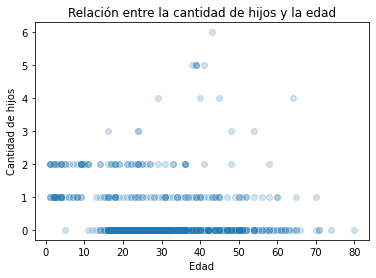

In [40]:
# crear un gráfico de dispersión que muestre la cantidad de hijos versus edad
plt.scatter(df['Edad'], df['Hijos'], alpha=0.2)

# agregar etiquetas y título al gráfico
plt.xlabel("Edad")
plt.ylabel("Cantidad de hijos")
plt.title("Relación entre la cantidad de hijos y la edad")

# mostrar el gráfico
plt.show()

Llamativo, vemos más hijos en las edades medias, de 30 a 60, pero también vemos personas de 0 a 10 años con hijos, y varias. Eso es sin duda algo extraño. Tiene que ser un error.

Acá podemos identificar a aquellos casos con esta carácteristica, menores de 15 y con algún hijo.

In [42]:
print(df[(df['Edad'] < 15) & (df['Hijos'] != 0)])

     Id Pasajeros  Supervivencia  Pclass       Sexo  Edad  Hermanos  Hijos  \
6               8              0       3  masculino     2         3      1   
9              11              1       3   femenino     4         1      1   
15             17              0       3  masculino     2         4      1   
21             25              0       3   femenino     8         3      1   
33             44              1       2   femenino     3         1      2   
..            ...            ...     ...        ...   ...       ...    ...   
637           825              0       3  masculino     2         4      1   
638           828              1       2  masculino     1         0      2   
653           851              0       3  masculino     4         4      2   
655           853              0       3   femenino     9         1      1   
669           870              1       3  masculino     4         1      1   

    Embarco  
6         S  
9         S  
15        Q  
21     

In [43]:
df = df.drop(df[(df['Edad'] < 15) & (df['Hijos'] != 0)].index)

Graficamos de nuevo para ver el impacto

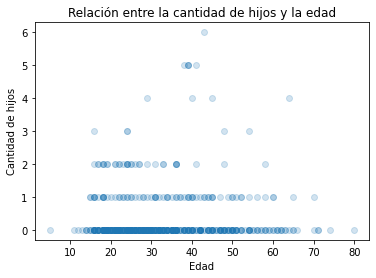

In [44]:
# crear un gráfico de dispersión que muestre la cantidad de hijos versus edad
plt.scatter(df['Edad'], df['Hijos'], alpha=0.2)

# agregar etiquetas y título al gráfico
plt.xlabel("Edad")
plt.ylabel("Cantidad de hijos")
plt.title("Relación entre la cantidad de hijos y la edad")

# mostrar el gráfico
plt.show()

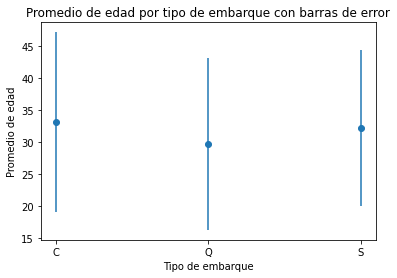

In [48]:

# obtener el promedio y la desviación estándar de edad por tipo de embarque
promedio_edad_por_embarque = df.groupby('Embarco')['Edad'].mean()
std_edad_por_embarque = df.groupby('Embarco')['Edad'].std()

# graficar el promedio de edad por tipo de embarque con barras de error
plt.errorbar(promedio_edad_por_embarque.index, promedio_edad_por_embarque.values, yerr=std_edad_por_embarque.values, fmt='o')
plt.xlabel('Tipo de embarque')
plt.ylabel('Promedio de edad')
plt.title('Promedio de edad por tipo de embarque con barras de error')
plt.show()

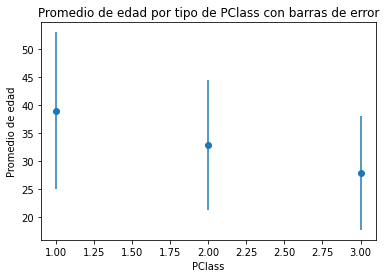

In [50]:
# obtener el promedio y la desviación estándar de edad por tipo de embarque
promedio_edad_por_embarque = df.groupby('Pclass')['Edad'].mean()
std_edad_por_embarque = df.groupby('Pclass')['Edad'].std()

# graficar el promedio de edad por tipo de embarque con barras de error
plt.errorbar(promedio_edad_por_embarque.index, promedio_edad_por_embarque.values, yerr=std_edad_por_embarque.values, fmt='o')
plt.xlabel('PClass')
plt.ylabel('Promedio de edad')
plt.title('Promedio de edad por tipo de PClass con barras de error')
plt.show()

## Parte Extra : A jugar un poco
En esta sección vamos a empezar a jugar un poco con la idea de lo que, en algún momento más adelante de la materia, buscaremos modelar o predecir, y es la supervivencia de los pasajeros.

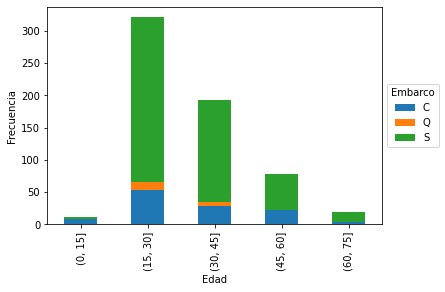

In [73]:
# crear una variable con los rangos de edad
bins = range(0, 81, 15)
#labels = ['{}-{}'.format(i, i+14) for i in range(0, 81, 15)]
df['rango_edad'] = pd.cut(df['Edad'], bins=bins)


# gráfico de barras apiladas para embarco
embarco_data = df.groupby(['rango_edad', 'Embarco'])['Embarco'].count().unstack()
embarco_data.plot(kind='bar', stacked=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Embarco', loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()
